In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [3]:
df_synth = pd.read_parquet("../../housing-data/df_synth.parquet")
df_synth

,SELLING_PRICE,DATE_OF_SALE,HOUSETYPE,SOC_CODE,LIVING_AREA,PLOT_AREA,CONSTRUCTION_YEAR,LAT,LON,DESTINATION,STORAGE_OR_SHED,GARAGE,MONUMENT
0,410399.0,2023-11-23,0,22,69.0,50.0,2006,51.930438,4.597374,0,1,1,0
1,553211.0,2024-08-31,3,10,143.0,170.0,1964,51.914836,4.439337,0,1,0,0
2,281874.0,2024-03-15,0,22,103.0,53.0,1949,51.910093,4.372199,0,1,0,0
3,311783.0,2017-10-30,2,9,182.0,164.0,1969,51.918368,4.322173,0,0,0,0
4,864350.0,2023-08-03,3,10,148.0,322.0,1938,51.932097,4.464516,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,219846.0,2019-08-19,0,22,88.0,53.0,1951,51.910131,4.404810,0,1,0,0
199996,369542.0,2023-09-30,0,24,94.0,50.0,1970,51.921255,4.562029,0,1,0,0
199997,271956.0,2018-12-23,0,25,83.0,52.0,1924,51.907061,4.498734,0,1,0,0
199998,140154.0,2018-01-27,3,10,89.0,201.0,1980,51.936764,4.371009,0,1,0,0


In [4]:
df_rotterdam = pd.read_csv("../../housing-data/rotterdam_transaction_data.csv")
df_rotterdam

,TRANSID,DATUM,WONINGTYPE,SOC,CALCOPP,KAVOPP,BOUWJAAR,BUURTCODE,LAT,LON,BESTEMMING,DUMMY_BERGING,DUMMY_GARAGE,DUMMY_MONUMENT,FOTOWIJZER_TYPE,LOG_KOOPSOM
0,7537440,2021-11-29,3.0,1131,97,132,1976,11,51.849001,4.541944,1.0,1,0,0,6,12.608199
1,7308578,2021-09-10,2.0,1121,181,457,1976,11,51.848052,4.544069,1.0,1,1,0,2,13.270783
2,4689877,2016-06-15,3.0,1131,90,109,2000,209,51.949338,4.512931,1.0,1,0,0,6,12.301383
3,5421309,2019-02-01,4.0,1111,196,346,1993,346,51.856716,4.403271,1.0,1,0,0,1,13.011432
4,6215385,2020-10-29,3.0,1131,87,111,1900,382,51.908115,4.350812,1.0,1,0,0,6,12.528156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108994,5490122,2019-05-08,0.0,1183,85,0,1968,82,51.932054,4.596247,1.0,1,0,0,9,12.107357
108995,5022491,2017-08-31,4.0,1111,232,756,1992,582,51.847523,4.156492,1.0,1,1,0,1,13.226904
108996,5014000,2017-08-01,3.0,1171,111,104,1980,239,51.944781,4.566412,1.0,1,0,0,4,12.122691
108997,4641789,2016-03-02,2.0,1121,100,104,1935,78,51.923281,4.586171,1.0,1,0,0,2,12.100712


In [3]:
df_train = pd.read_parquet('../../housing-data/transactions/df_train_FCS.parquet')
df_test = pd.read_parquet('../../housing-data/transactions/df_test_FCS.parquet')
df_train

,TRANSID,SELLING_PRICE,DATE_OF_SALE,MONTH_ORDINAL,PROVINCECODE,COROPPLUSCODE,MUNICIPALITYCODE,CBS_NEIGHBORHOOD,CBS_DISTRICT,ZIPCODE_NUMERIC,...,INDUSTRY_AND_ENERGY,TRADE_AND_HOSPITALITY,TRANSPORT_INFORMATION_AND_COMMUNICATION,FINANCIAL_SERVICES_AND_REAL_ESTATE,BUSINESS_SERVICES,CULTURE_RECREATION_AND_OTHER_SERVICES,CARS_PER_HOUSEHOLD,SCHOOL_DISTANCE,DEGREE_OF_URBANIZATION,ENVIRONMENTAL_ADDRESS_DENSITY
1068837,5179156,131250,2018-03-29,51,PV22,CP0800,GM0114,BU01140801,WK011408,7891,...,85,120,15,20,50,50,1.2,0.5,4.0,911.0
1374374,8423975,410000,2023-07-04,115,PV25,CP1500,GM0268,BU02680970,WK026809,6663,...,95,140,105,105,420,165,1.0,0.7,3.0,1132.0
225195,8657107,310560,2024-05-16,125,PV23,CP1200,GM0183,BU01830002,WK018300,7651,...,60,115,20,45,70,45,1.3,0.7,4.0,660.0
931396,6419778,250000,2021-02-02,86,PV31,CP3800,GM0988,BU09882201,WK098822,6006,...,35,40,5,15,40,35,1.0,0.5,2.0,1937.0
857006,4418085,221500,2015-03-30,15,PV23,CP1000,GM0148,BU01480101,WK014801,7721,...,5,50,0,15,20,10,1.0,0.6,4.0,717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,4568430,307500,2015-11-09,23,PV25,CP1500,GM1705,BU17050211,WK170502,6851,...,60,60,20,50,110,50,1.1,0.8,3.0,1422.0
1414414,5224766,1375000,2018-05-04,53,PV27,CP2311,GM0363,BU0363AG06,WK0363AG,1017,...,25,105,40,100,210,80,0.5,0.5,1.0,8977.0
131932,6347848,170000,2020-12-07,84,PV20,CP0100,GM0037,BU00370110,WK003701,9501,...,20,30,10,10,20,20,1.1,0.5,5.0,426.0
671155,5213993,205015,2018-05-04,53,PV25,CP1400,GM1586,BU15860109,WK158601,7132,...,25,10,5,20,25,15,1.3,0.4,4.0,974.0


In [4]:
edge_ind = pd.read_csv("../../housing-data/buurt_adjacency.csv", index_col=0)
edge_ind

,BU09989999,BU00349997,BU00509997,BU00609998,BU00729998,BU00889998,BU00939998,BU00969998,BU01669997,BU01719997,...,BU19923005,BU19923006,BU19923009,BU19923100,BU19923109,BU19923200,BU19923201,BU19923202,BU19923209,BU19923300
BU09989999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BU00349997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BU00509997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BU00609998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BU00729998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BU19923200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
BU19923201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
BU19923202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
BU19923209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [19]:
node_features = pd.read_csv("../../housing-data/district_info.csv")
node_features

,BUURTCODE,PEILDATUM,LEEFBAAROMETER,GROEN,EC,NO2,PM2_5,PM10,GELUIDSHINDERTOTAAL,AFSTANDTOTHUISARTSENPRAKTIJK,...,MATEVANSTEDELIJKHEID,OMGEVINGSADRESSENDICHTHEID,GEMIDDELDEWOZWAARDEVANWONINGEN,TOTAALDIEFSTALUITWONINGSCHUURED,GEWELDSENSEKSUELEMISDRIJVEN,VERNIELINGMISDRIJFTEGENOPENBAREORDE,OQOVERHEIDONDERWIJSENZORG,VLIEGTUIG,TREIN,GELUIDSHINDERINDUSTRIE
0,BU00030007,1/1/2018,4.195031,0.028880,0.000294,0.009311,0.007416,0.013866,0.307536,2.0,...,5,348,298.0,0.0,3.0,3.0,NaN,0.5,0.1,1.3
1,BU00030007,1/1/2019,4.195124,0.028869,0.000294,0.009312,0.007414,0.013863,0.307441,2.1,...,5,359,298.0,0.0,3.0,3.0,NaN,0.5,0.1,1.3
2,BU00030007,1/1/2020,4.169609,0.028895,0.000224,0.007272,0.006450,0.012967,0.307923,2.1,...,5,362,298.0,0.0,3.0,3.0,NaN,0.5,0.1,1.3
3,BU00030008,1/1/2014,4.251458,0.043239,0.000285,0.009420,0.007372,0.013800,0.319748,3.0,...,5,71,285.0,10.0,0.0,20.0,NaN,0.6,0.4,1.3
4,BU00030008,1/1/2015,4.251458,0.043239,0.000285,0.009420,0.007372,0.013800,0.319748,3.0,...,5,72,285.0,10.0,0.0,20.0,NaN,0.6,0.4,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147600,BU19450201,1/1/2024,4.227346,0.053809,0.000244,0.010508,0.008375,0.015093,0.282222,1.3,...,5,291,522.0,4.0,0.0,4.0,NaN,3.9,0.3,NaN
147601,BU19450300,1/1/2024,4.147552,0.034181,0.000237,0.010177,0.008276,0.014974,0.271579,2.5,...,5,147,349.0,11.0,1.0,0.0,NaN,3.9,0.4,NaN
147602,BU19450301,1/1/2024,4.213128,0.046378,0.000238,0.010148,0.008287,0.014996,0.261597,2.7,...,5,205,486.0,6.0,4.0,0.0,NaN,3.5,0.3,NaN
147603,BU19450400,1/1/2024,4.276418,0.046571,0.000253,0.011890,0.008367,0.015066,0.298843,1.9,...,5,75,379.0,2.0,4.0,4.0,NaN,1.7,0.2,NaN


In [27]:
buurt_ids = edge_ind.columns.values
buurt_idx_maq = {k:v for v,k in enumerate(buurt_ids)}

unique_codes = node_features["BUURTCODE"].unique()
count=0
missing_burt_codes = set()
for code in unique_codes:
    if code not in buurt_idx_maq.keys():
        count +=1
        missing_burt_codes.add(code)
        # print(code)
print(count)
print(missing_burt_codes)
df_missing = node_features[node_features["BUURTCODE"].isin(missing_burt_codes)]
df_missing = df_missing[["BUURTCODE", "PEILDATUM"]].sort_values("PEILDATUM", ascending=False)
for date in  df_missing["PEILDATUM"].unique():
    print(date)
    buurten = df_missing[df_missing["PEILDATUM"] == date]["BUURTCODE"].values
    print(len(buurten))
    print(buurten)

4117
{'BU19870300', 'BU00860408', 'BU18940003', 'BU00180302', 'BU05690001', 'BU01400004', 'BU00170000', 'BU00170108', 'BU08241104', 'BU04570008', 'BU19211902', 'BU02250403', 'BU02890004', 'BU04160001', 'BU03631900', 'BU00220409', 'BU06200001', 'BU05032701', 'BU06030663', 'BU07721639', 'BU17230200', 'BU17230009', 'BU03920800', 'BU08550301', 'BU01960010', 'BU03630449', 'BU19240600', 'BU00804401', 'BU05690003', 'BU06540006', 'BU07560601', 'BU00805201', 'BU00400100', 'BU06870103', 'BU03850109', 'BU00400108', 'BU09951222', 'BU01601106', 'BU17190409', 'BU00141808', 'BU03639100', 'BU17220202', 'BU05880103', 'BU03639405', 'BU03636501', 'BU04250003', 'BU04411004', 'BU03840225', 'BU03981302', 'BU04411006', 'BU00340214', 'BU07840200', 'BU17110528', 'BU19270202', 'BU18940400', 'BU03636403', 'BU05320100', 'BU08550209', 'BU00810008', 'BU03630212', 'BU08550700', 'BU00340207', 'BU03631502', 'BU04791610', 'BU17190200', 'BU00100948', 'BU09952441', 'BU00790109', 'BU03638200', 'BU05690302', 'BU15980309', 

In [6]:
vernummerings_2024 = pd.read_excel("../../housing-data/vernummerings_overzicht.xlsx", sheet_name="2023-2024")
vernummerings_2024

,2023,2024
0,BU02250004,BU02250109
1,BU02250201,BU02250402
2,BU17341703,BU17341903
3,WK022501,WK022505
4,WK022504,WK022506


In [ ]:
import geopandas as gpd
import libpysal as lp

In [15]:
df = pd.concat([df_train, df_test])
df["year_of_sale"] = df["DATE_OF_SALE"].dt.year
unique_years_per_n = df.groupby("CBS_NEIGHBORHOOD")['year_of_sale'].nunique()
unique_years_per_n[unique_years_per_n < 11]

CBS_NEIGHBORHOOD
BU00140007     6
BU00140008    10
BU00140501    10
BU00140507     2
BU00140508     2
              ..
BU19922108     3
BU19923109     8
BU19923202    10
BU19923209     7
BU19923300     2
Name: year_of_sale, Length: 5389, dtype: int64

In [3]:
df_train.columns

Index(['TRANSID', 'SELLING_PRICE', 'DATE_OF_SALE', 'MONTH_ORDINAL',
       'PROVINCECODE', 'COROPPLUSCODE', 'MUNICIPALITYCODE', 'CBS_NEIGHBORHOOD',
       'CBS_DISTRICT', 'ZIPCODE_NUMERIC', 'LAT', 'LON', 'HOUSETYPE',
       'SOC_CODE', 'DESTINATION', 'LIVING_AREA', 'PLOT_AREA',
       'CONSTRUCTION_YEAR', 'GARAGE', 'STORAGE_OR_SHED', 'MONUMENT',
       'ENERGYLABEL', 'LOCATION', 'QUALITY', 'MAINTENANCE', 'APPEARANCE',
       'EFFICIENCY', 'FACILITIES', 'EXTENSION_AREA', 'STORAGE_AREA',
       'GARAGE_AREA', 'TOTAL_NOISE_NUISANCE', 'GREENERY', 'PM10', 'PM2_5',
       'NO2', 'GENERAL_PRACTITIONER_DISTANCE',
       'GENERAL_PRACTITIONER_POST_DISTANCE', 'PHARMACY_DISTANCE',
       'HOSPITAL_DISTANCE', 'HOSPITAL_EXCL_OUTPATIENT_CLINIC_DISTANCE',
       'LARGE_SUPERMARKET_DISTANCE', 'DAILY_GROCERIES_DISTANCE',
       'DEPARTMENT_STORE_DISTANCE', 'CAFE_DISTANCE', 'SNACK_BAR_DISTANCE',
       'RESTAURANT_DISTANCE', 'DAYCARE_DISTANCE', 'AFTER_SCHOOL_CARE_DISTANCE',
       'MAIN_ROAD_ACCESS_DIST

In [4]:
ord_encoder = OrdinalEncoder(unknown_value=-1, handle_unknown='use_encoded_value') # missing values are encoded as -1  
cat_cols = ['CBS_NEIGHBORHOOD', 'CBS_DISTRICT', 'PROVINCECODE', 'COROPPLUSCODE', 'MUNICIPALITYCODE', 'DESTINATION', 'HOUSETYPE'] 
df_train[cat_cols] = ord_encoder.fit_transform(df_train[cat_cols])
df_test[cat_cols] = ord_encoder.transform(df_test[cat_cols])  

In [5]:
df_train['LOG_SELLING_PRICE'] = np.log(df_train['SELLING_PRICE'])   
df_test['LOG_SELLING_PRICE'] = np.log(df_test['SELLING_PRICE'])

In [6]:
alpha = 0.005
price_per_m2 = df_train['SELLING_PRICE'] / df_train['LIVING_AREA']
quantile_threshold = np.quantile(price_per_m2, [alpha/2, 1-alpha/2])
df_train = df_train[(price_per_m2 > quantile_threshold[0]) & (price_per_m2 < quantile_threshold[1])]

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185738 entries, 1068837 to 121958
Data columns (total 78 columns):
 #   Column                                    Non-Null Count    Dtype         
---  ------                                    --------------    -----         
 0   TRANSID                                   1185738 non-null  int64         
 1   SELLING_PRICE                             1185738 non-null  int64         
 2   DATE_OF_SALE                              1185738 non-null  datetime64[ns]
 3   MONTH_ORDINAL                             1185738 non-null  int64         
 4   PROVINCECODE                              1185738 non-null  float64       
 5   COROPPLUSCODE                             1185738 non-null  float64       
 6   MUNICIPALITYCODE                          1185738 non-null  float64       
 7   CBS_NEIGHBORHOOD                          1185738 non-null  float64       
 8   CBS_DISTRICT                              1185738 non-null  float64       
 9   ZI

In [ ]:
df_train.to_csv("../../")

In [8]:
X_train, y_train = df_train.drop(columns=['TRANSID', "SELLING_PRICE", "LOG_SELLING_PRICE", "DATE_OF_SALE"]), df_train['LOG_SELLING_PRICE']
X_test, y_test = df_test.drop(columns=['TRANSID', "SELLING_PRICE", "LOG_SELLING_PRICE", "DATE_OF_SALE"]), df_test['LOG_SELLING_PRICE']

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train)
X_train = imp_median.transform(X_train)
X_test = imp_median.transform(X_test)
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


In [10]:
X_train

array([[-0.53396119, -1.63126824, -1.39091724, ..., -0.36616881,
         0.95399243, -0.59538189],
       [ 1.26172118, -0.57960013, -0.89143751, ...,  0.06432126,
         0.21522265, -0.46350566],
       [ 1.54229655, -1.2807122 , -1.10550025, ...,  0.06432126,
         0.95399243, -0.74515988],
       ...,
       [ 0.39193753, -2.33238031, -1.89039696, ..., -0.36616881,
         1.6927622 , -0.88479354],
       [-0.47784612, -0.57960013, -0.96279176, ..., -0.58141384,
         0.95399243, -0.55778822],
       [ 0.11136216, -1.2807122 , -1.10550025, ...,  0.27956636,
        -0.52354712,  0.04013028]])

In [38]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(54), activation="relu",learning_rate_init = 0.0001, random_state=42, verbose=1).fit(X_train, y_train)


Iteration 1, loss = 11.74532861
Iteration 2, loss = 0.81380582
Iteration 3, loss = 0.30134978
Iteration 4, loss = 0.16710611
Iteration 5, loss = 0.11292699
Iteration 6, loss = 0.08609667
Iteration 7, loss = 0.06933359
Iteration 8, loss = 0.05451540
Iteration 9, loss = 0.04549620
Iteration 10, loss = 0.03858563
Iteration 11, loss = 0.03286878
Iteration 12, loss = 0.02649379
Iteration 13, loss = 0.02342631
Iteration 14, loss = 0.02017564
Iteration 15, loss = 0.01844415
Iteration 16, loss = 0.01747631
Iteration 17, loss = 0.01695419
Iteration 18, loss = 0.01654689
Iteration 19, loss = 0.01627136
Iteration 20, loss = 0.01637838
Iteration 21, loss = 0.01583707
Iteration 22, loss = 0.01610526
Iteration 23, loss = 0.01539552
Iteration 24, loss = 0.01560607
Iteration 25, loss = 0.01512481
Iteration 26, loss = 0.01508517
Iteration 27, loss = 0.01476322
Iteration 28, loss = 0.01465781
Iteration 29, loss = 0.01456375
Iteration 30, loss = 0.01447090
Iteration 31, loss = 0.01490251
Iteration 32, lo

mean ratio: 1.0189891684029688, mape: 0.1218296708790907


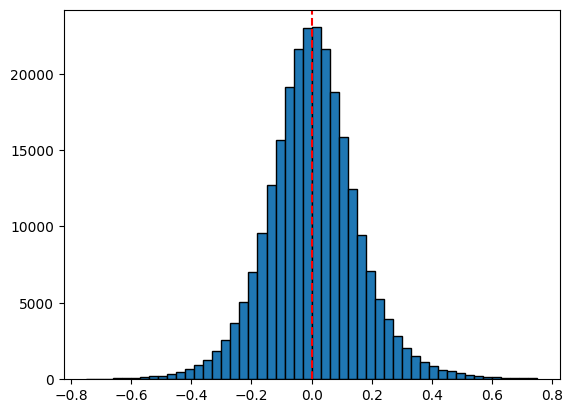

In [39]:
log_y_pred = model.predict(X_test)
y_pred = np.exp(log_y_pred)
mape = np.abs(y_pred / np.exp(y_test) - 1).mean()
ratio =  np.mean(y_pred / np.exp(y_test))

print(f"mean ratio: {ratio}, mape: {mape}")

log_res = log_y_pred - y_test

bins = np.linspace(-0.75, 0.75, 51)
plt.hist(log_res, bins=bins, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

In [30]:
print(log_res)

print(model.predict(X_train))

1209612    0.054713
1272564    0.010465
1390377    0.001719
641591    -0.123821
1358542    0.008653
             ...   
1097298   -0.002744
1363647    0.200249
1561696    0.223233
1566873   -0.085651
131030     0.106092
Name: LOG_SELLING_PRICE, Length: 255388, dtype: float64
[11.85593828 13.05600997 12.62683658 ... 11.81296533 12.22904828
 12.65716508]


In [31]:
log_train_error = model.predict(X_train) - y_train
print(np.mean(np.abs(log_train_error)))
log_train_error.mean()

0.11961581134623173


-0.003140959561129542

In [33]:
mape = np.abs(y_pred / np.exp(y_test) - 1).mean()
ratio =  np.mean(y_pred / np.exp(y_test))


0.12251588252175609
1.0108407915763524


## Test GNN model with other data

In [16]:
import torch
from torch_geometric.nn import GCNConv, Linear

class NeighborhoodEmbedder(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(NeighborhoodEmbedder, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
    
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x


class PricePredictor(torch.nn.Module):
    def __init__(self, gnn_out_channels, hidden_dims, transaction_dims):
        super(PricePredictor, self).__init__()
        self.fc1 = Linear(gnn_out_channels+transaction_dims, hidden_dims)
        self.fc2 = Linear(hidden_dims, 1)
    
    def forward(self, neighbor_embedding, transaction):
        x = torch.cat([neighbor_embedding, transaction], dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class NeuralNet(torch.nn.Module):
    def __init__(self, hidden_dims, transaction_dims):
        super(NeuralNet, self).__init__()
        self.fc1 = Linear(transaction_dims, hidden_dims)
        self.fc2 = Linear(hidden_dims, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
def train_epoch(gnn, predictor, loader, optimizer, edge_index, node_features, buurt_idx_map, loss_fn,  device="cpu"):
    """ 
    Trains model for one epoch using the specified data loader and optimizer.

    Args:
        gnn: The gnn embedding model to be trained
        predictor: The neural network predictor to be trained
        loader (DataLoader): The DataLoader containing the training data
        optimizer: Theoptimizer used for training
        edge_index: The adjaceny matrix fo the neighborhoods
        node_features: The ids of the nodes (Buurtcodes mapped to indices)
        buurt_idx_map: Maps the Neighborhood codes to indices
        loss_fn: Loss function used (MSELoss mainly)
        device: The device used for training the model (default: cpu)

    Returns:
        float: The mean loss valueover all the batches in the DataLoader.
    """

    gnn.to(device)
    predictor.to(device)

    gnn.train()
    predictor.train()
    # updated_node_features = initial_node_features.clone()
    total_loss = 0
    total_mape = 0
    for data in loader:
        # data = data.to(device)
        optimizer.zero_grad()
        # updated_node_features[neighborhood_ids] = torch.tensor(data["node_features"])
        node_embeddings = gnn(node_features, edge_index)
        neighborhood_ids= [buurt_idx_map[spatial_code] for spatial_code in data["spatial_level"]]
        neighborhood_embeddings = node_embeddings[neighborhood_ids].to(device)
        transaction_features = torch.tensor(data["transaction_vector"], dtype=torch.float32).to(device)
    
        predicted_price = predictor(neighborhood_embeddings, transaction_features)
        # predicted_price = predictor( transaction_features)
        actual_price = torch.tensor(data["target_price"],dtype=torch.float32).unsqueeze(1)
        
        loss = loss_fn(predicted_price,actual_price)
        mae = nn.L1Loss()(torch.exp(predicted_price), torch.exp(actual_price))
        mape = torch.mean(torch.abs(torch.exp(actual_price)-torch.exp(predicted_price))/torch.exp(actual_price))
    
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_mape += mape.item()
    
    return total_loss/len(loader), total_mape/len(loader)

def evaluate_epoch(gnn, predictor, loader, loss_fn, edge_index, node_features, buurt_idx_map, device="cpu"):
    """
    Evaluates the performance of a trained neural network model on a dataset using the specified data loader

    """

    gnn.to(device)
    predictor.to(device)

    gnn.eval()
    predictor.eval()

    total_loss = 0
    total_mape = 0
    
    with torch.no_grad():
        for data in loader:
           
            node_embeddings = gnn(node_features, edge_index)
            neighborhood_ids= [buurt_idx_map[spatial_code] for spatial_code in data["spatial_level"]]
            neighborhood_embeddings = node_embeddings[neighborhood_ids].to(device)
            
            transaction_features = torch.tensor(data["transaction_vector"], dtype=torch.float32)
            
            predicted_price = predictor(neighborhood_embeddings, transaction_features)
            # predicted_price = predictor( transaction_features)
            actual_price = torch.tensor(data["target_price"],dtype=torch.float32).unsqueeze(1)
        
            loss = loss_fn(predicted_price,actual_price)
            
            mae = nn.L1Loss()(torch.exp(predicted_price), torch.exp(actual_price))
            mape = torch.mean(torch.abs(torch.exp(actual_price)-torch.exp(predicted_price))/torch.exp(actual_price))
            total_loss += loss.item()
            total_mape += mape.item()
    return total_loss/len(loader), total_mape/len(loader)

def train(config_path, edge_index, train_data_loader, test_data_loader, device):
    
    config_dict = json.load(open(config_path))
    num_nodes = len(edge_index)
    num_features = 1
    initial_node_features = torch.rand((num_nodes, num_features))
    transaction_dim=90
    # print(transaction_dim)
    
    gnn = NeighborhoodEmbedder(in_channels=num_features, hidden_channels=8, out_channels=4)
    predictor = PricePredictor(gnn_out_channels=4, transaction_dims=transaction_dim, hidden_dims=64)
    # predictor = NeuralNet( transaction_dims=transaction_dim, hidden_dims=16)
    optimizer = torch.optim.Adam(list(gnn.parameters())+list(predictor.parameters()), lr=0.005)
    loss_fn = torch.nn.MSELoss()
    

    num_epochs = 25
    buurt_ids = edge_index.columns.values

    buurt_idx_map = {k:int(v) for v,k in enumerate(buurt_ids)}
    

    edge_index = edge_index.to_numpy("float")
    edge_index = np.triu(edge_index)
    edge_index= torch.tensor(edge_index, dtype=torch.float32)
    edge_index_tensor = edge_index.to_sparse_csr().to(device)
    node_features = torch.tensor(list(buurt_idx_map.values()), dtype=torch.float).unsqueeze(1)
    
    train_losses, test_losses = [], []
    train_mapes, test_mapes = [], []

    # Training loop
    for epoch in range(num_epochs):
        train_loss, train_mape = train_epoch(gnn, predictor, train_data_loader, optimizer, edge_index_tensor, node_features, buurt_idx_map, loss_fn, device)

        test_loss, test_mape = evaluate_epoch(gnn, predictor, test_data_loader, loss_fn, edge_index_tensor, node_features, buurt_idx_map, device)

        train_losses.append(train_loss)
        train_mapes.append(train_mape)

        test_losses.append(test_loss)
        test_mapes.append(test_mape)
        print(f'Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Train MAPE = {train_mape:.4f},   Test Loss = {test_loss:.4f}, Test MAPE = {test_mape:.4f}')


    # Visualize Results
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Losses (MSE)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test MAE')
    plt.legend()
    plt.show()


C:\Users\AratrikaD\AppData\Local\Programs\Python\Python310\python.exe: can't open file 'c:\\Users\\AratrikaD\\gnns-for-property-valuation\\src\\utils\\main.py': [Errno 2] No such file or directory
